#                         Organic VS Non-Organic?
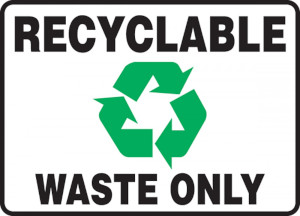

## Introduction
- In this kernel, We will try to classify Organic vs Non-Organic materials with ANN and CNN Methods.

**Import Libraries**

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

**Load the data**

In [33]:
train_o = ("/kaggle/input/waste-classification-data/DATASET/TRAIN/O/")
train_r = ("/kaggle/input/waste-classification-data/DATASET/TRAIN/R/")
val_o = ("/kaggle/input/waste-classification-data/DATASET/TEST/O/")
val_r = ("/kaggle/input/waste-classification-data/DATASET/TEST/0/")

**Some samples**

(-0.5, 299.5, 149.5, -0.5)

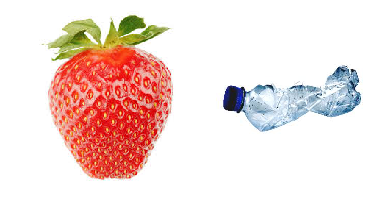

In [34]:
import matplotlib.image as mpimg
img1=mpimg.imread('/kaggle/input/waste-classification-data/DATASET/TRAIN/O/O_1.jpg')
img2=mpimg.imread('/kaggle/input/waste-classification-data/DATASET/TRAIN/R/R_10.jpg')
plt.subplot(1, 2, 1)    
plt.imshow(img1) 
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')

**Data Preparation**

In [35]:
def get_all_images(folder, ext):
    all_files = []
    for file in os.listdir(folder):
        
        _,  file_ext = os.path.splitext(file)
        
        if ext in file_ext:
            full_file_path = os.path.join(folder, file)
            all_files.append(full_file_path)

    return all_files

In [36]:
filepath1 = "/kaggle/input/waste-classification-data/DATASET/TRAIN/O/"
filepath2 = "/kaggle/input/waste-classification-data/DATASET/TRAIN/R/"
filepath3 = "/kaggle/input/waste-classification-data/DATASET/TEST/O/"
filepath4 = "/kaggle/input/waste-classification-data/DATASET/TEST/R/"

o_train = get_all_images(filepath1, 'jpg')
r_train = get_all_images(filepath2, 'jpg')
o_val = get_all_images(filepath3, 'jpg')
r_val = get_all_images(filepath1, 'jpg')

print("o_train: {}".format(len(o_train))),
print("r_train: {}".format(len(o_train)))
print("o_val: {}".format(len(o_train)))
print("r_val: {}".format(len(o_train)))

o_train: 12565
r_train: 12565
o_val: 12565
r_val: 12565


In [37]:
from PIL import Image
import cv2 
from tqdm import tqdm 

image_size = 64

X1 = []
X2 = []
X3 = []
X4 = []

for image in tqdm(os.listdir(filepath1)):
    p = os.path.join(filepath1, image)
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten() 
    X1.append(img)
    
for image in tqdm(os.listdir(filepath2)):
    p = os.path.join(filepath2, image)
    img2 = cv2.imread(p, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    X2.append(img2)
    
for image in tqdm(os.listdir(filepath3)):
    p = os.path.join(filepath3, image)
    img3 = cv2.imread(p, cv2.IMREAD_GRAYSCALE) 
    img3 = cv2.resize(img3, (image_size, image_size)).flatten() 
    X3.append(img3)
    
for image in tqdm(os.listdir(filepath4)):
    p = os.path.join(filepath4, image)
    img4 = cv2.imread(p, cv2.IMREAD_GRAYSCALE) 
    img4 = cv2.resize(img4, (image_size, image_size)).flatten() 
    X4.append(img4)

# Convert to array    
X1 = np.asarray(X1)    
X2 = np.asarray(X2)
X3 = np.asarray(X3)    
X4 = np.asarray(X4)    

100%|██████████| 1112/1112 [00:01<00:00, 725.62it/s]


In [38]:
# "0" for the organic food and "1" for the not.
x = np.concatenate((X1[0:400],X2[0:400]), axis = 0)

zero = np.zeros(400)
one = np.ones(400)

y = np.concatenate((zero,one), axis = 0).reshape(-1,1)
print("x shape :", x.shape)
print("y shape :", y.shape)

x shape : (800, 4096)
y shape : (800, 1)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15,random_state=42)
number_of_train=x_train.shape[0]
number_of_test=x_test.shape[0]

In [40]:
print("X train ",x_train.shape)
print("X test ",x_test.shape)

X train  (680, 4096)
X test  (120, 4096)


In [41]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 680)
x test:  (4096, 120)
y train:  (1, 680)
y test:  (1, 120)


## 2-Layer Neural Network

In [42]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [43]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [44]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [45]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [46]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [47]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [48]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.357062
Cost after iteration 100: 0.356083
Cost after iteration 200: 0.349801
Cost after iteration 300: 0.345971
Cost after iteration 400: 0.335802
Cost after iteration 500: 0.335281
Cost after iteration 600: 0.335188
Cost after iteration 700: 0.334516
Cost after iteration 800: 0.332219
Cost after iteration 900: 0.333629


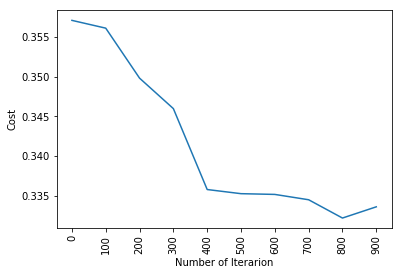

train accuracy: 52.794117647058826 %
test accuracy: 44.166666666666664 %


In [49]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=1000)

In [50]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

## L-Layer Neural Network

In [51]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units =128 , kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')) 
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')) 
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')) 
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')) 
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) 
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return classifier               

classifier = KerasClassifier(build_fn = build_classifier, epochs = 50)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 4)  
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/50
510/510 [==============================] - 0s 714us/step - loss: 0.6924 - accuracy: 0.5137
Epoch 2/50
510/510 [==============================] - 0s 122us/step - loss: 0.6901 - accuracy: 0.5137
Epoch 3/50
510/510 [==============================] - 0s 111us/step - loss: 0.6892 - accuracy: 0.5137
Epoch 4/50
510/510 [==============================] - 0s 122us/step - loss: 0.6871 - accuracy: 0.5137
Epoch 5/50
510/510 [==============================] - 0s 118us/step - loss: 0.6841 - accuracy: 0.5137
Epoch 6/50
510/510 [==============================] - 0s 148us/step - loss: 0.6884 - accuracy: 0.5157
Epoch 7/50
510/510 [==============================] - 0s 124us/step - loss: 0.6862 - accuracy: 0.5137
Epoch 8/50
510/510 [==============================] - 0s 111us/step - loss: 0.6810 - accuracy: 0.5137
Epoch 9/50
510/510 [==============================] - 0s 109us/step - loss: 0.6811 - accuracy: 0.5196
Epoch 10/50
510/510 [==============================] - 0s 112us/step - loss: 0.674

## CNN Model

In [2]:
# libraries
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob
import matplotlib.image as mpimg

Using TensorFlow backend.


In [53]:
train_path= "/kaggle/input/waste-classification-data/DATASET/TRAIN"
test_path= "/kaggle/input/waste-classification-data/DATASET/TEST/"

In [54]:
img1=mpimg.imread('/kaggle/input/waste-classification-data/DATASET/TRAIN/O/O_1.jpg')
x1 = img_to_array(img1)
print(x1.shape)

(242, 208, 3)


In [55]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClasses: ",numberOfClass)

NumberOfClasses:  2


In [56]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x1.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 10000 // batch_size,
        epochs=5,
        validation_data = test_generator,
        validation_steps = 8000 // batch_size)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/5


In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()